<a href="https://colab.research.google.com/github/Rogerio-mack/Analise_de_Dados_2023S2/blob/main/Aula_20231006.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<head>
  <meta name="author" content="Rogério de Oliveira">
  <meta institution="author" content="Universidade Presbiteriana Mackenzie">
</head>

<img src="http://meusite.mackenzie.br/rogerio/mackenzie_logo/UPM.2_horizontal_vermelho.jpg" width=300, align="right">
<!-- <h1 align=left><font size = 6, style="color:rgb(200,0,0)"> optional title </font></h1> -->



# Lab: Aula online




# Basic imports

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


# **CASE: Cigarettes**





## Read...

In [33]:
df = pd.read_csv('https://vincentarelbundock.github.io/Rdatasets/csv/AER/CigarettesSW.csv')
df = df.drop(columns='rownames')
df.head()

,state,year,cpi,population,packs,income,tax,price,taxs
0,AL,1985,1.076,3973000,116.486282,46014968,32.500004,102.181671,33.348335
1,AR,1985,1.076,2327000,128.534592,26210736,37.000000,101.474998,37.000000
2,AZ,1985,1.076,3184000,104.522614,43956936,31.000000,108.578751,36.170418
3,CA,1985,1.076,26444000,100.363037,447102816,26.000000,107.837341,32.104000
4,CO,1985,1.076,3209000,112.963539,49466672,31.000000,94.266663,31.000000


## Inspeção inicial dos dados

In [34]:
df.shape

(96, 9)

In [35]:
len(df)

96

In [36]:
df.describe(include='all')

,state,year,cpi,population,packs,income,tax,price,taxs
count,96,96.000000,96.000000,9.600000e+01,96.000000,9.600000e+01,96.000000,96.000000,96.000000
unique,48,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,AL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,1990.000000,1.300000,5.168866e+06,109.182424,9.987874e+07,42.684028,143.447938,48.326150
std,NaN,5.026247,0.225176,5.442345e+06,25.871305,1.205411e+08,16.138088,43.887444,19.332215
min,NaN,1985.000000,1.076000,4.784470e+05,49.272198,6.887097e+06,18.000000,84.967995,21.268000
25%,NaN,1985.000000,1.076000,1.622606e+06,92.450159,2.552038e+07,31.000000,102.706415,34.770125
50%,NaN,1990.000000,1.300000,3.697472e+06,110.160660,6.166164e+07,37.000002,137.720383,41.048750
75%,NaN,1995.000000,1.524000,5.901500e+06,123.523010,1.273140e+08,50.875000,176.150471,59.476979


In [37]:
df.dtypes

state          object
year            int64
cpi           float64
population      int64
packs         float64
income          int64
tax           float64
price         float64
taxs          float64
dtype: object

## Selecionando uma Coluna

In [38]:
df.population

0      3973000
1      2327000
2      3184000
3     26444000
4      3209000
        ...   
91      582827
92     5431024
93     5137004
94     1820560
95      478447
Name: population, Length: 96, dtype: int64

In [39]:
df['population']

0      3973000
1      2327000
2      3184000
3     26444000
4      3209000
        ...   
91      582827
92     5431024
93     5137004
94     1820560
95      478447
Name: population, Length: 96, dtype: int64

In [40]:
col = 'population'
df[col]

0      3973000
1      2327000
2      3184000
3     26444000
4      3209000
        ...   
91      582827
92     5431024
93     5137004
94     1820560
95      478447
Name: population, Length: 96, dtype: int64

In [41]:
df.columns

Index(['state', 'year', 'cpi', 'population', 'packs', 'income', 'tax', 'price',
       'taxs'],
      dtype='object')

In [42]:
for c in ['population', 'packs', 'income']:
  print(c, ' mean = ', df[c].mean())

population  mean =  5168866.322916667
packs  mean =  109.18242386976878
income  mean =  99878735.73958333


In [43]:
df.population.mean(), df.population.std(), df.population.sum(), df.population.max(),

(5168866.322916667, 5442344.657406039, 496211167, 31493524)

In [44]:
df['population'].var()

29619115369996.047

In [45]:
df['state'].unique()

array(['AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DE', 'FL', 'GA', 'IA', 'ID',
       'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME', 'MI', 'MN', 'MO',
       'MS', 'MT', 'NC', 'ND', 'NE', 'NH', 'NJ', 'NM', 'NV', 'NY', 'OH',
       'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VA', 'VT',
       'WA', 'WI', 'WV', 'WY'], dtype=object)

In [46]:
df['state'].nunique()

48

In [47]:
df.state.value_counts()

AL    2
AR    2
NE    2
NH    2
NJ    2
NM    2
NV    2
NY    2
OH    2
OK    2
OR    2
PA    2
RI    2
SC    2
SD    2
TN    2
TX    2
UT    2
VA    2
VT    2
WA    2
WI    2
WV    2
ND    2
NC    2
MT    2
IL    2
AZ    2
CA    2
CO    2
CT    2
DE    2
FL    2
GA    2
IA    2
ID    2
IN    2
MS    2
KS    2
KY    2
LA    2
MA    2
MD    2
ME    2
MI    2
MN    2
MO    2
WY    2
Name: state, dtype: int64

## Selecionando várias colunas

In [48]:
df.columns

Index(['state', 'year', 'cpi', 'population', 'packs', 'income', 'tax', 'price',
       'taxs'],
      dtype='object')

In [49]:
df[ ['state', 'year', 'population'] ]

,state,year,population
0,AL,1985,3973000
1,AR,1985,2327000
2,AZ,1985,3184000
3,CA,1985,26444000
4,CO,1985,3209000
...,...,...,...
91,VT,1995,582827
92,WA,1995,5431024
93,WI,1995,5137004
94,WV,1995,1820560


In [50]:
pop = df[ ['state', 'year', 'population'] ]
pop.head()

,state,year,population
0,AL,1985,3973000
1,AR,1985,2327000
2,AZ,1985,3184000
3,CA,1985,26444000
4,CO,1985,3209000


## Seleção de linhas

In [53]:
df[ df.population > 20000000 ]

,state,year,cpi,population,packs,income,tax,price,taxs
3,CA,1985,1.076,26444000,100.363037,447102816,26.0,107.837341,32.104000
51,CA,1995,1.524,31493524,56.859306,771470144,61.0,210.504669,74.771332


In [55]:
df[ (df.state == 'CA') | (df.state == 'VT') ] # AND = &

,state,year,cpi,population,packs,income,tax,price,taxs
3,CA,1985,1.076,26444000,100.363037,447102816,26.0,107.837341,32.104000
43,VT,1985,1.076,530000,145.283020,6887097,33.0,100.983337,33.000000
51,CA,1995,1.524,31493524,56.859306,771470144,61.0,210.504669,74.771332
91,VT,1995,1.524,582827,122.334755,12448607,44.0,175.638748,52.363750


In [56]:
df_CAVT = df[ (df.state == 'CA') | (df.state == 'VT') ]
df_CAVT.describe(include='all')

,state,year,cpi,population,packs,income,tax,price,taxs
count,4,4.000000,4.000000,4.000000e+00,4.000000,4.000000e+00,4.000000,4.000000,4.000000
unique,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,CA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,1990.000000,1.300000,1.476259e+07,106.210030,3.094772e+08,41.000000,148.741024,48.059771
std,NaN,5.773503,0.258653,1.653291e+07,37.666902,3.706593e+08,15.253415,53.204459,20.111481
min,NaN,1985.000000,1.076000,5.300000e+05,56.859306,6.887097e+06,26.000000,100.983337,32.104000
25%,NaN,1985.000000,1.076000,5.696202e+05,89.487104,1.105823e+07,31.250000,106.123840,32.776000
50%,NaN,1990.000000,1.300000,1.351341e+07,111.348896,2.297757e+08,38.500000,141.738045,42.681875
75%,NaN,1995.000000,1.524000,2.770638e+07,128.071821,5.281946e+08,48.250000,184.355228,57.965646


## Selecionar linhas E colunas

In [57]:
df[ (df.state == 'CA') | (df.state == 'VT') ][ ['state', 'year', 'population'] ]


,state,year,population
3,CA,1985,26444000
43,VT,1985,530000
51,CA,1995,31493524
91,VT,1995,582827


In [58]:
df[ (df.state == 'CA') | (df.state == 'VT') ].population

3     26444000
43      530000
51    31493524
91      582827
Name: population, dtype: int64

In [59]:
df[ (df.state == 'CA') | (df.state == 'VT') ].population.mean()

14762587.75

## Qual o percentual de dados do ano de 1985?

In [62]:
len( df[ df.year == 1985 ] ) / len(df)

0.5

## Qual o percentual da população da CA do total no ano de 1995?

In [68]:
df[ (df.state == 'CA') & (df.year == 1995) ]['population']

51    31493524
Name: population, dtype: int64

In [70]:
df['population'].sum()

496211167

In [72]:
df[ (df.state == 'CA') & (df.year == 1995) ]['population'] / df['population'].sum()

51    0.063468
Name: population, dtype: float64

# **CASE: Guns**





# Starting...

In [30]:
guns = pd.read_csv('https://vincentarelbundock.github.io/Rdatasets/csv/AER/Guns.csv')
guns.head()

,rownames,year,violent,murder,robbery,prisoners,afam,cauc,male,population,income,density,state,law
0,1,1977,414.4,14.2,96.8,83,8.384873,55.12291,18.17441,3.780403,9563.148,0.074552,Alabama,no
1,2,1978,419.1,13.3,99.1,94,8.352101,55.14367,17.99408,3.831838,9932.000,0.075567,Alabama,no
2,3,1979,413.3,13.2,109.5,144,8.329575,55.13586,17.83934,3.866248,9877.028,0.076245,Alabama,no
3,4,1980,448.5,13.2,132.1,141,8.408386,54.91259,17.73420,3.900368,9541.428,0.076829,Alabama,no
4,5,1981,470.5,11.9,126.5,149,8.483435,54.92513,17.67372,3.918531,9548.351,0.077187,Alabama,no


In [31]:
guns.law.value_counts()

no     888
yes    285
Name: law, dtype: int64

In [ ]:
guns.income.mean()

13724.796065643648

# Read

In [ ]:
df = pd.read_csv('https://vincentarelbundock.github.io/Rdatasets/csv/AER/Guns.csv')
df.drop(columns='Unnamed: 0',inplace=True)
display( df.head() )


,year,violent,murder,robbery,prisoners,afam,cauc,male,population,income,density,state,law
0,1977,414.4,14.2,96.8,83,8.384873,55.12291,18.17441,3.780403,9563.148,0.074552,Alabama,no
1,1978,419.1,13.3,99.1,94,8.352101,55.14367,17.99408,3.831838,9932.000,0.075567,Alabama,no
2,1979,413.3,13.2,109.5,144,8.329575,55.13586,17.83934,3.866248,9877.028,0.076245,Alabama,no
3,1980,448.5,13.2,132.1,141,8.408386,54.91259,17.73420,3.900368,9541.428,0.076829,Alabama,no
4,1981,470.5,11.9,126.5,149,8.483435,54.92513,17.67372,3.918531,9548.351,0.077187,Alabama,no


In [ ]:
display( df )

,year,violent,murder,robbery,prisoners,afam,cauc,male,population,income,density,state,law
0,1977,414.4,14.2,96.8,83,8.384873,55.12291,18.17441,3.780403,9563.148,0.074552,Alabama,no
1,1978,419.1,13.3,99.1,94,8.352101,55.14367,17.99408,3.831838,9932.000,0.075567,Alabama,no
2,1979,413.3,13.2,109.5,144,8.329575,55.13586,17.83934,3.866248,9877.028,0.076245,Alabama,no
3,1980,448.5,13.2,132.1,141,8.408386,54.91259,17.73420,3.900368,9541.428,0.076829,Alabama,no
4,1981,470.5,11.9,126.5,149,8.483435,54.92513,17.67372,3.918531,9548.351,0.077187,Alabama,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1168,1995,254.2,2.1,17.9,254,1.485849,73.71621,15.37098,0.478447,14070.160,0.004927,Wyoming,yes
1169,1996,249.7,3.3,20.4,289,1.521814,73.85796,15.44601,0.480085,14032.230,0.004944,Wyoming,yes
1170,1997,255.2,3.5,17.7,310,1.527818,73.92731,15.49400,0.480031,14790.980,0.004943,Wyoming,yes
1171,1998,247.6,4.8,16.2,326,1.558396,73.98515,15.51021,0.480045,15225.510,0.004944,Wyoming,yes


# Exploração Inicial

In [ ]:
df.shape

(1173, 13)

In [ ]:
len(df)

1173

In [ ]:
df.dtypes

year            int64
violent       float64
murder        float64
robbery       float64
prisoners       int64
afam          float64
cauc          float64
male          float64
population    float64
income        float64
density       float64
state          object
law            object
dtype: object

In [ ]:
df.describe(include='all')

,year,violent,murder,robbery,prisoners,afam,cauc,male,population,income,density,state,law
count,1173.000000,1173.000000,1173.000000,1173.000000,1173.000000,1173.000000,1173.000000,1173.000000,1173.000000,1173.000000,1173.000000,1173,1173
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,51,2
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Alabama,no
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23,888
mean,1988.000000,503.074680,7.665132,161.820205,226.579710,5.336217,62.945432,16.081127,4.816341,13724.796066,0.352038,NaN,NaN
std,6.636079,334.277194,7.522710,170.509962,178.888094,4.885688,9.761527,1.732143,5.252115,2554.542334,1.355472,NaN,NaN
min,1977.000000,47.000000,0.200000,6.400000,19.000000,0.248207,21.780430,12.213680,0.402753,8554.884000,0.000707,NaN,NaN
25%,1982.000000,283.100000,3.700000,71.100000,114.000000,2.202196,59.939700,14.653370,1.187706,11934.760000,0.031911,NaN,NaN
50%,1988.000000,443.000000,6.400000,124.100000,187.000000,4.026213,65.061280,15.895170,3.271332,13401.550000,0.081569,NaN,NaN
75%,1994.000000,650.900000,9.800000,192.700000,291.000000,6.850673,69.200100,17.525710,5.685611,15271.010000,0.177718,NaN,NaN


# Seleção de 1 atributo

In [ ]:
df.income

0        9563.148
1        9932.000
2        9877.028
3        9541.428
4        9548.351
          ...    
1168    14070.160
1169    14032.230
1170    14790.980
1171    15225.510
1172    15765.070
Name: income, Length: 1173, dtype: float64

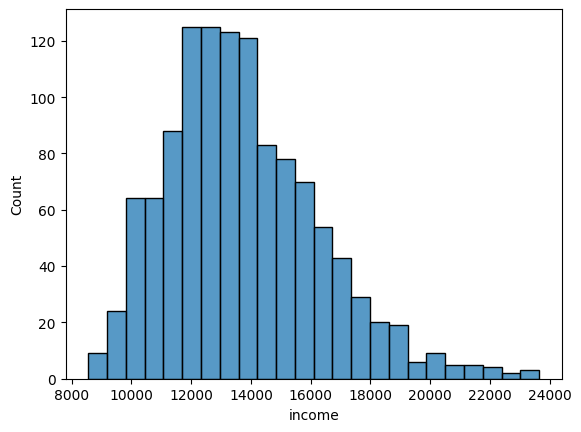

In [ ]:
sns.histplot(df.income)

plt.show()

In [ ]:
df['income'] # Série de dados, somente valores

0        9563.148
1        9932.000
2        9877.028
3        9541.428
4        9548.351
          ...    
1168    14070.160
1169    14032.230
1170    14790.980
1171    15225.510
1172    15765.070
Name: income, Length: 1173, dtype: float64

In [ ]:
df[['income']] # Dataframe, ou tabela, com 1 coluna

,income
0,9563.148
1,9932.000
2,9877.028
3,9541.428
4,9548.351
...,...
1168,14070.160
1169,14032.230
1170,14790.980
1171,15225.510


In [ ]:
df.income.mean()

13724.796065643648

In [ ]:
df['income'].std()

2554.542334423021

In [ ]:
df[['income']].quantile([0.25,0.75])

,income
0.25,11934.76
0.75,15271.01


In [ ]:
df.income.var()

6525686.538359419

In [ ]:
df.year.value_counts()

1977    51
1989    51
1998    51
1997    51
1996    51
1995    51
1994    51
1993    51
1992    51
1991    51
1990    51
1988    51
1978    51
1987    51
1986    51
1985    51
1984    51
1983    51
1982    51
1981    51
1980    51
1979    51
1999    51
Name: year, dtype: int64

In [ ]:
df.year.unique()

array([1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987,
       1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998,
       1999])

In [ ]:
df.state.unique()

array(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
       'Colorado', 'Connecticut', 'Delaware', 'District of Columbia',
       'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana',
       'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland',
       'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi',
       'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire',
       'New Jersey', 'New Mexico', 'New York', 'North Carolina',
       'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania',
       'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee',
       'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming'], dtype=object)

# Seleção de linhas


In [ ]:
df.columns

Index(['year', 'violent', 'murder', 'robbery', 'prisoners', 'afam', 'cauc',
       'male', 'population', 'income', 'density', 'state', 'law'],
      dtype='object')

In [ ]:
df[ df.state == 'Alaska' ]

,year,violent,murder,robbery,prisoners,afam,cauc,male,population,income,density,state,law
23,1977,443.2,10.8,96.8,63,7.835672,62.14130,22.35269,0.403437,20296.83,0.000708,Alaska,no
24,1978,441.9,12.9,91.3,75,7.945618,62.65009,22.05606,0.404764,19044.99,0.000711,Alaska,no
25,1979,491.1,13.3,109.6,127,8.057296,63.09599,21.97401,0.402753,18115.89,0.000707,Alaska,no
26,1980,436.0,8.9,81.8,133,8.123558,62.72060,21.55065,0.405315,17901.66,0.000710,Alaska,no
27,1981,615.8,14.6,114.6,143,8.153878,62.80371,21.01661,0.418488,18075.23,0.000733,Alaska,no
28,1982,623.7,18.5,133.8,170,8.149489,62.89593,20.32379,0.449611,18967.13,0.000788,Alaska,no
29,1983,613.8,13.8,97.1,194,8.114173,62.86964,19.54211,0.488417,19045.00,0.000856,Alaska,no
30,1984,621.6,11.6,109.4,219,8.094755,62.41428,18.85155,0.513703,18590.22,0.000900,Alaska,no
31,1985,581.8,9.8,92.9,252,8.053830,61.88262,18.22919,0.532492,18705.20,0.000933,Alaska,no
32,1986,570.4,8.6,88.0,288,8.082400,61.26970,17.81123,0.544269,17906.39,0.000954,Alaska,no


In [ ]:
Alaska = df[ df.state == 'Alaska' ]

In [ ]:
Alaska.head()

,year,violent,murder,robbery,prisoners,afam,cauc,male,population,income,density,state,law
23,1977,443.2,10.8,96.8,63,7.835672,62.14130,22.35269,0.403437,20296.83,0.000708,Alaska,no
24,1978,441.9,12.9,91.3,75,7.945618,62.65009,22.05606,0.404764,19044.99,0.000711,Alaska,no
25,1979,491.1,13.3,109.6,127,8.057296,63.09599,21.97401,0.402753,18115.89,0.000707,Alaska,no
26,1980,436.0,8.9,81.8,133,8.123558,62.72060,21.55065,0.405315,17901.66,0.000710,Alaska,no
27,1981,615.8,14.6,114.6,143,8.153878,62.80371,21.01661,0.418488,18075.23,0.000733,Alaska,no


In [ ]:
Alaska.income.mean()

17712.906521739133

In [ ]:
df[ df.state == 'Alaska' ].income.mean()

17712.906521739133

In [ ]:
df[ df.state == 'Alaska' ]['income'].mean()

17712.906521739133

In [ ]:
df[ df.state == 'Alaska' ][['income']].mean()

income    17712.906522
dtype: float64

# Proporções

In [ ]:
len(df)

1173

In [ ]:
df.shape[0]

1173

In [ ]:
df.law.value_counts()

no     888
yes    285
Name: law, dtype: int64

In [ ]:
len( df[ df.law == 'yes' ] )

285

In [ ]:
len( df[ df.law == 'yes' ] ) / len(df)

0.24296675191815856